In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei' #顯示中文(for Mac)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",80) #設定pandas最多顯示出50個欄位資訊

In [2]:
X = pd.read_csv("./input/train.csv",header=None)
y = pd.read_csv("./input/trainLabels.csv",header=None)
test = pd.read_csv("./input/test.csv",header=None)

In [3]:
X.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,-1.408370,1.114744,0.910415,2.218110,4.305643,0.088924,0.169149,0.413448,1.513862,2.662967,-1.072765,0.149111,0.559579,4.378885,-0.463603,-0.063959,0.544930,0.712772,-1.494050,-2.636169,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,0.935347,1.057796,-0.539275,-0.172662,-0.679051,0.607362,1.148635,2.437077,-0.313069,0.528104,-0.513476,0.766221,-1.466939,-2.318885,1.647223,-1.556443,-1.645581,-0.198467,-1.472066,-1.906147,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,-0.890270,0.909969,-11.851312,3.352420,-4.862125,-0.903317,-1.824344,0.045446,-2.126474,1.161563,-1.027912,-1.078792,1.848525,3.758918,0.623649,-0.091044,-1.033094,-0.254151,-4.377542,-1.196298,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436


In [4]:
y.head(3)

,0
0,1
1,0
2,0


In [5]:
test.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,-0.247797,1.527068,3.359963,1.172500,1.823865,0.032365,-0.506474,0.116775,0.302796,-0.069677,-1.067652,0.268855,-2.114816,-2.829966,-0.379520,2.498289,-0.943095,0.826023,0.738353,-1.250244,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,-0.392141,0.396406,-6.404201,0.892782,-0.277077,-2.277002,0.020142,0.244746,-3.129533,0.646215,0.596033,-0.183858,-1.724840,-4.744641,0.735539,1.987149,0.308611,0.191700,-3.309266,-1.474186,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,-1.152022,0.219019,-1.660207,1.830836,-2.055934,0.361885,0.406346,1.473729,1.697615,0.212823,-0.126665,-0.267433,-2.318000,-2.978056,0.122586,0.411849,-0.591939,-0.112360,-3.033888,-2.880890,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784


In [6]:
len(test)

9000

In [7]:
corr = X.corr()
print(corr)

          0         1         2         3         4         5         6   \
0   1.000000 -0.029022  0.033437  0.012054 -0.022404  0.037209  0.019134   
1  -0.029022  1.000000  0.014202  0.009663  0.044758 -0.034173 -0.008474   
2   0.033437  0.014202  1.000000  0.007579  0.019658 -0.013532 -0.054348   
3   0.012054  0.009663  0.007579  1.000000  0.023827  0.021305 -0.028903   
4  -0.022404  0.044758  0.019658  0.023827  1.000000  0.027705 -0.338883   
5   0.037209 -0.034173 -0.013532  0.021305  0.027705  1.000000 -0.068367   
6   0.019134 -0.008474 -0.054348 -0.028903 -0.338883 -0.068367  1.000000   
7   0.015277  0.006568 -0.008825 -0.044407  0.206964  0.036041 -0.000915   
8  -0.045568  0.039895  0.019443  0.001253  0.063638  0.031510 -0.031153   
9  -0.023777  0.008368 -0.015920 -0.049892  0.079723 -0.023893  0.065493   
10 -0.037427  0.022105  0.011994 -0.031417 -0.051509 -0.004594 -0.006394   
11  0.012477 -0.034953  0.023328  0.052135 -0.019005 -0.058050  0.036516   
12 -0.004410

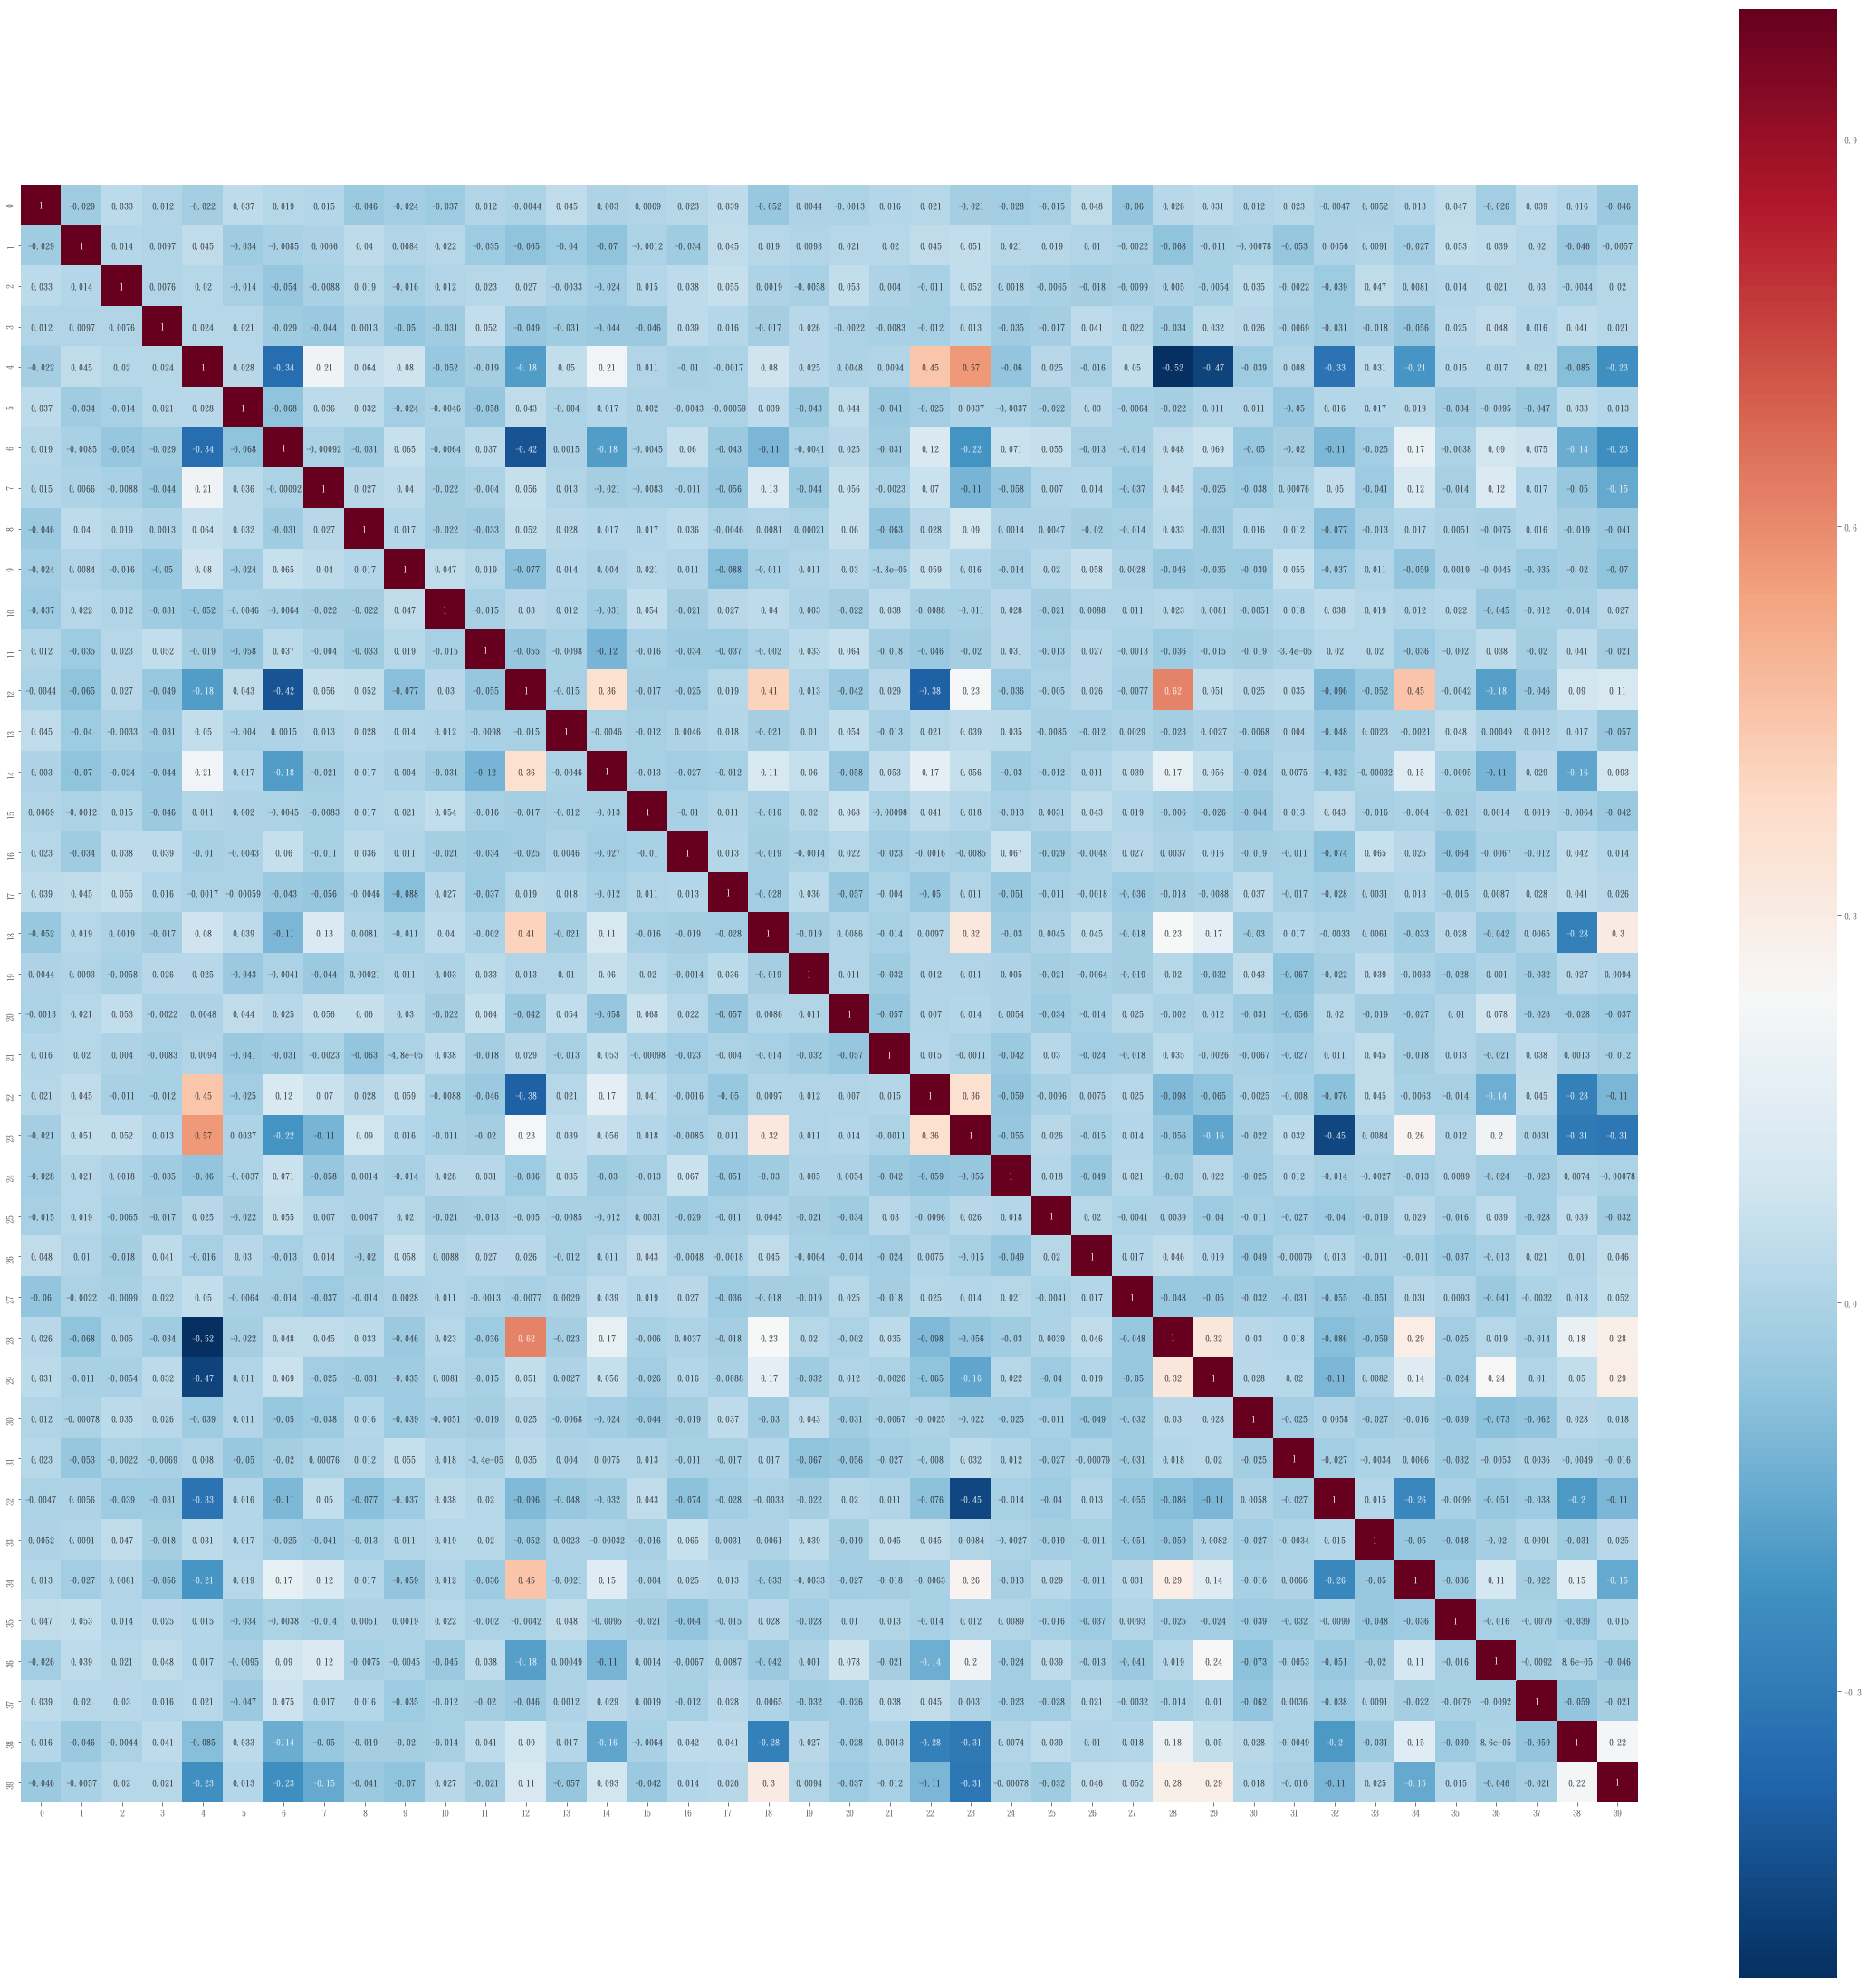

In [8]:
import seaborn as sns
plt.rcParams['font.family']='DFKai-SB' #顯示中文
plt.figure(figsize=(40,40))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"
#sns.plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
836,0.102779,-0.199372,0.463495,-0.847312,-1.445708,-0.326604,-0.293438,-2.202522,1.078323,-0.865261,0.502683,-0.009290,6.049494,0.456662,3.487071,-1.272826,-0.430860,-0.780380,-0.420346,-1.741490,1.207195,-0.820815,-3.329656,2.868839,-0.498860,1.246022,-0.016919,0.719957,2.912453,3.552154,-0.488331,0.367702,-5.031359,-2.016386,1.605913,0.012293,3.582551,-0.388994,1.078361,1.384469
724,0.039585,0.723498,0.912530,1.090686,6.182949,-0.035000,-2.967893,-2.513158,-0.666391,-2.285819,0.657216,0.145245,-3.275642,-0.226957,0.417443,-0.651984,-0.346036,1.029841,-2.062241,-0.356049,1.054455,-0.281530,1.020549,3.602082,-0.631751,0.664629,-0.457342,-0.448230,-4.007717,-1.569231,0.117934,-0.229665,-1.945187,0.227123,-0.676655,-0.051030,-0.277648,1.707033,-0.693985,1.528447


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train)

print(metrics.classification_report(y_test, knn.predict(X_test)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      0.86      0.90       149
          1       0.87      0.95      0.91       151

avg / total       0.91      0.90      0.90       300

[[128  21]
 [  8 143]]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
rfc.fit(X_train, y_train) #不標準化

print("oob_score(accuary):",rfc.oob_score_)
print(metrics.classification_report(y_test, rfc.predict(X_test)))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


oob_score(accuary): 0.86
             precision    recall  f1-score   support

          0       0.86      0.91      0.89       149
          1       0.91      0.85      0.88       151

avg / total       0.88      0.88      0.88       300



In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print(metrics.classification_report(y_test, gnb.predict(X_test)))
print(metrics.confusion_matrix(y_test, gnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       149
          1       0.86      0.79      0.83       151

avg / total       0.84      0.83      0.83       300

[[130  19]
 [ 31 120]]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf", probability=True)
svc.fit(X_train, y_train)

print(metrics.classification_report(y_test, svc.predict(X_test)))
print(metrics.confusion_matrix(y_test, svc.predict(X_test)))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.90      0.94      0.92       149
          1       0.94      0.90      0.92       151

avg / total       0.92      0.92      0.92       300

[[140   9]
 [ 15 136]]


In [14]:
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import xgboost as xgb

clf1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf2 = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
#clf3 = GaussianNB()
clf4 = SVC(C=1.0, kernel="rbf", probability=True)
meta_clf = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4)
stacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf4], meta_classifier=meta_clf)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
#clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

print('KNN Score:',clf1.score(X_test, y_test))
print('RF Score:',clf2.score(X_test, y_test))
#print('GNB Score:',clf3.score(X_test, y_test))
print('SVC Score:',clf4.score(X_test, y_test))
print('Stacking Score:',stacking_clf.score(X_test, y_test))

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d a

KNN Score: 0.903333333333
RF Score: 0.876666666667
SVC Score: 0.92
Stacking Score: 0.88


In [15]:
row_id = [i for i in range(1,9001)]

In [16]:
pred = stacking_clf.predict(test)

# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'Id': row_id, 'Solution': pred })[["Id","Solution"]]
StackingSubmission.to_csv("submission_xgb_3m_stk.csv", index=False)

In [17]:
##xgb 4m score: 0.86810
##xgb 3m score: 0.87071
